[![UAEM](https://www.uaem.mx/fcaei/images/uaem.png)](https://www.uaem.mx/fcaei/moca.html)
[![Python 3.9](https://img.shields.io/badge/Python-3.9-blue.svg)](https://www.python.org/downloads/release/python-390/)
[![Maintenance](https://img.shields.io/badge/Maintained%3F-yes-green.svg)](https://github.com/EmilianoRdzV/AIR-QUALITY)

# Proyecto: Análisis y Predicción de la Calidad del Aire con Machine Learning

**Autor:** [Emiliano Rodriguez Villegas](https://github.com/EmilianoRdzV)
**Fecha:** 06 de Junio de 2025
**Versión:** 1.0

---

## 1. Introducción y Motivación

Este notebook presenta un análisis completo de la calidad del aire en seis metrópolis globales. El objetivo es aplicar un flujo de trabajo de ciencia de datos, desde la limpieza de datos hasta la construcción de un modelo de Machine Learning para clasificar la calidad del aire.

La elección de este conjunto de datos se basa en su **volumen**, la **diversidad geográfica** de las ciudades, la **riqueza de sus características** y su **componente temporal**, que lo hacen ideal para el análisis y la modelización.

---

### Índice General del Notebook

1.  [**Fase 1: Metodología y Preparación**](#fase-1)
    * [1.1. Diagrama de Flujo del Proyecto](#1-1)
    * [1.2. Carga de Datos desde URL](#1-2)
    * [1.3. Preprocesamiento y Limpieza](#1-3)
    * [1.4. Análisis Estadístico Descriptivo](#1-4)
2.  [**Fase 2: Análisis Exploratorio de Datos (EDA)**](#fase-2)
    * [2.1. Análisis de Distribuciones (Histogramas)](#2-1)
    * [2.2. Comparativa de AQI entre Ciudades (Box Plot)](#2-2)
    * [2.3. Análisis de Correlación (Heatmap)](#2-3)
3.  [**Fase 3: Modelado de Clasificación**](#fase-3)
    * [3.1. Preparación de Datos para el Modelo](#3-1)
    * [3.2. Entrenamiento del Modelo (Perceptrón / Adaline)](#3-2)
    * [3.3. Visualización y Evaluación de Resultados](#3-3)
4.  [**Fase 4: Discusión y Conclusiones**](#fase-4)
    * [4.1. Análisis del Modelo y Propuestas de Mejora](#4-1)
    * [4.2. Comparación con la Literatura](#4-2)
    * [4.3. Trabajo Futuro](#4-3)

## <a id="fase-1"></a>1. Metodología y Preparación

### <a id="1-1"></a>1.1. Diagrama de Flujo del Proyecto

A continuación, se presenta un diagrama de flujo que resume visualmente la metodología y los pasos a seguir en este proyecto, desde la adquisición de los datos hasta la obtención de conclusiones.

![Diagrama de Flujo del Proyecto](../Images/FTrabajo.png)

### <a id="1-2"></a>1.2. Carga de Datos desde URL


Se procederá a cargar el conjunto de datos en un DataFrame de `pandas`. URL de la DB: https://www.kaggle.com/datasets/youssefelebiary/air-quality-2024/data


*** Se intento leer los datos directamente desde una URL pero por el volumen de datos no se realizo, no todas las DBs lo permiten, asi que se opto por descargar la DB y trabajarla desde el alojamiennto local en ../Data/Air_Quality.csv

### Carga de Datos

In [15]:
import pandas as pd 

rutaDatos = '../Data/Air_Quality.csv'
dataFrame = pd.read_csv(rutaDatos)

#Info bascia para observar el paronama de los datos
print (dataFrame.head())


                        Date      City     CO  CO2   NO2  SO2    O3  PM2.5  \
0  2024-01-01 00:00:00+00:00  Brasilia  323.0  NaN  23.8  2.8  42.0   12.0   
1  2024-01-01 01:00:00+00:00  Brasilia  318.0  NaN  21.9  2.7  40.0   12.5   
2  2024-01-01 02:00:00+00:00  Brasilia  309.0  NaN  19.2  2.6  39.0   12.1   
3  2024-01-01 03:00:00+00:00  Brasilia  295.0  NaN  16.3  2.4  38.0   11.4   
4  2024-01-01 04:00:00+00:00  Brasilia  270.0  NaN  13.0  2.1  40.0   10.2   

   PM10        AQI  
0  17.1  16.800000  
1  17.9  16.000000  
2  17.3  15.599999  
3  16.2  15.200000  
4  14.6  16.000000  


### <a id="1-3"></a>1.3. Preprocesamiento y Limpieza


En esta etapa, abordaremos los problemas comunes en los datos crudos para asegurar su calidad. El proceso se dividirá en:
1.  Identificar la cantidad de valores nulos (NaN).
2.  Imputar (rellenar) los valores nulos con una estrategia adecuada.
3.  Verificar y eliminar filas duplicadas.

**Justificación del Procedimiento:** No se eliminarán las filas con valores NaN directamente, ya que esto podría resultar en una pérdida significativa de datos secuenciales, lo cual es vital para el análisis de series temporales. En su lugar, se optará por la **interpolación lineal**, un método que estima un valor faltante basándose en los valores numéricos que lo rodean, asumiendo una progresión constante entre ellos. Esta es una técnica robusta para datos de sensores como los de calidad del aire.

In [16]:
# 1: Revisión de Valores Nulos 
print("* Conteo de Valores Nulos ANTES del preprocesamiento")
print(dataFrame.isnull().sum())

# 2: Imputación de Valores por Interpolación Lineal
dataFrame.interpolate(method='linear', inplace=True)
dataFrame.fillna(method='bfill', inplace=True)

print("\n* Conteo de Valores Nulos DESPUÉS de la imputación")
print(dataFrame.isnull().sum())

* Conteo de Valores Nulos ANTES del preprocesamiento
Date         0
City         0
CO           0
CO2      43056
NO2          0
SO2          0
O3           0
PM2.5        0
PM10         0
AQI          0
dtype: int64

* Conteo de Valores Nulos DESPUÉS de la imputación
Date     0
City     0
CO       0
CO2      0
NO2      0
SO2      0
O3       0
PM2.5    0
PM10     0
AQI      0
dtype: int64


C:\Users\evrdz\AppData\Local\Temp\ipykernel_25768\2586584511.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  dataFrame.interpolate(method='linear', inplace=True)
C:\Users\evrdz\AppData\Local\Temp\ipykernel_25768\2586584511.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  dataFrame.fillna(method='bfill', inplace=True)


In [17]:
# 3: Verificación y Eliminación de Duplicados
print(f"\nNúmero de filas duplicadas encontradas: {dataFrame.duplicated().sum()}")

# Fila duplicada, se elimina.
dataFrame.drop_duplicates(inplace=True)

print("\n Preprocesamiento y limpieza de datos comletado.")


Número de filas duplicadas encontradas: 0

 Preprocesamiento y limpieza de datos comletado.


### Corregir el formato de la columna de fecha 
Convertiremos la columna de fecha al tipo `datetime`, despues se convertira en el index del Data Frame 

In [18]:
# Columna de texto a un objeto de fecha y hora (datetime)
dataFrame['Date'] = pd.to_datetime(dataFrame['Date'])

# Establece la columna 'Date' como el nuevo índice del DataFrame
dataFrame.set_index('Date', inplace=True)

# Verificamos que el cambio se haya realizado correctamente
print("--- Info después de procesar la fecha ---")
dataFrame.info()

print("\n--- DataFrame con índice de fecha ---")
display(dataFrame.head())

--- Info después de procesar la fecha ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52704 entries, 2024-01-01 00:00:00+00:00 to 2024-12-31 23:00:00+00:00
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   City    52704 non-null  object 
 1   CO      52704 non-null  float64
 2   CO2     52704 non-null  float64
 3   NO2     52704 non-null  float64
 4   SO2     52704 non-null  float64
 5   O3      52704 non-null  float64
 6   PM2.5   52704 non-null  float64
 7   PM10    52704 non-null  float64
 8   AQI     52704 non-null  float64
dtypes: float64(8), object(1)
memory usage: 4.0+ MB

--- DataFrame con índice de fecha ---


,City,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
Date,,,,,,,,,
2024-01-01 00:00:00+00:00,Brasilia,323.0,471.0,23.8,2.8,42.0,12.0,17.1,16.800000
2024-01-01 01:00:00+00:00,Brasilia,318.0,471.0,21.9,2.7,40.0,12.5,17.9,16.000000
2024-01-01 02:00:00+00:00,Brasilia,309.0,471.0,19.2,2.6,39.0,12.1,17.3,15.599999
2024-01-01 03:00:00+00:00,Brasilia,295.0,471.0,16.3,2.4,38.0,11.4,16.2,15.200000
2024-01-01 04:00:00+00:00,Brasilia,270.0,471.0,13.0,2.1,40.0,10.2,14.6,16.000000


### Guardamos el Data Frame ya procesado

In [19]:
# Ruta para el nuevo archivo CSV limpio
rutaArchivoLimpio = '../Data/AirQualityCleaned.csv'

# index=True asegura que la columna de fecha se guarde en el archivo
dataFrame.to_csv(rutaArchivoLimpio, index=True)

print(f"Los datos limpios se han guardado en: '{rutaArchivoLimpio}'")

Los datos limpios se han guardado en: '../Data/AirQualityCleaned.csv'


### <a id="1-4"></a>1.4. Análisis Estadístico Descriptivo

Una vez que los datos están limpios, es útil obtener un resumen numérico de alto nivel de todas las características. Utilizaremos la función `.describe()` 

In [20]:
# Estadísticas descriptiva
# Media, desviación estándar, valores mínimos y máximos, y los percentiles.
estadisticas = dataFrame.describe()

display(estadisticas)

,CO,CO2,NO2,SO2,O3,PM2.5,PM10,AQI
count,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000,52704.000000
mean,258.258121,467.441940,24.102998,12.569869,60.025729,17.689931,35.643143,41.349339
std,159.589953,25.299260,19.363443,17.266623,38.217348,15.670075,48.444774,26.626149
min,52.000000,434.000000,0.000000,0.000000,0.000000,0.100000,0.100000,4.450000
25%,159.000000,449.000000,9.700000,2.300000,35.000000,6.900000,10.200000,22.800000
50%,213.000000,461.839418,18.900000,5.700000,54.000000,12.500000,18.900000,31.270835
75%,306.000000,471.585203,33.400000,16.800000,78.000000,23.000000,37.500000,57.702089
max,2045.000000,884.000000,165.900000,239.700000,349.000000,129.500000,543.900000,196.633330


## <a id="fase-2"></a>2. Fase 2: Análisis Exploratorio de Datos (EDA)

Con los datos ya limpios, podemos comenzar a explorarlos para entender sus características principales. En esta fase, buscaremos patrones y relaciones a través de resúmenes estadísticos y, fundamentalmente, visualizaciones gráficas. `matplotlib` `seaborn`

---

### <a id="2-1"></a>2.1 Análisis Descriptivo General

Aunque ya vimos una tabla de estadísticas en la fase anterior, las visualizaciones nos permiten entender la **distribución** de los datos de una manera más intuitiva. Crearemos histogramas para las columnas más importantes (AQI y los principales contaminantes) para observar cómo se reparten sus valores: si son simétricos, si tienen sesgos, etc.

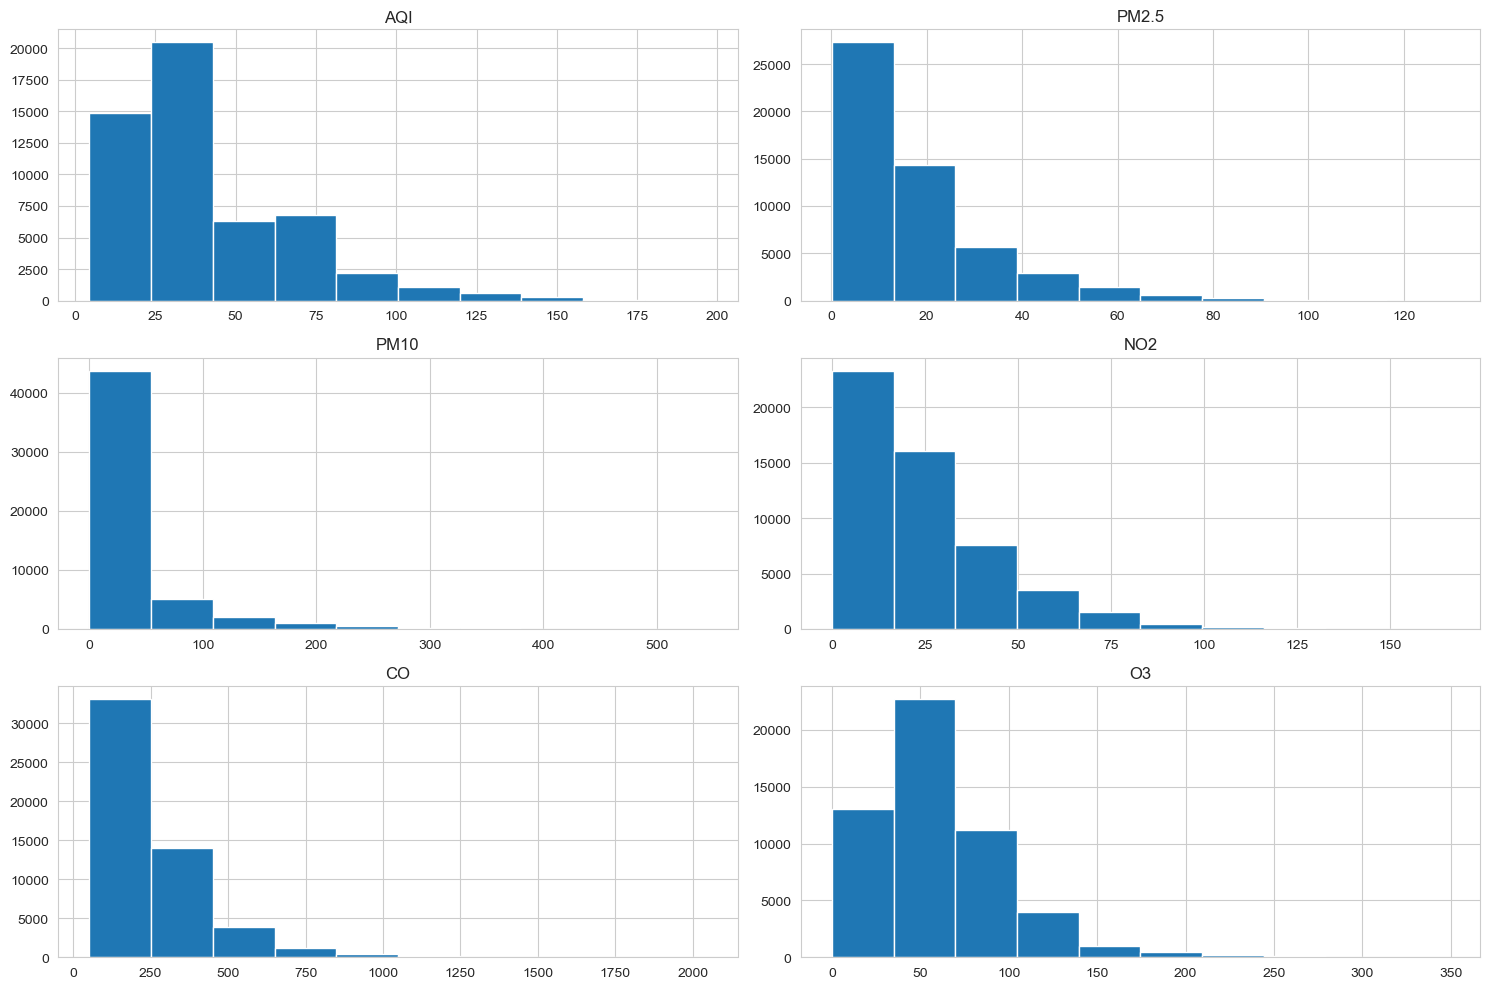

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar el estilo de los gráficos para que se vean mejor
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (15, 10)

columnasVisualizar = ['AQI', 'PM2.5', 'PM10', 'NO2', 'CO', 'O3']

# Histograma para cada columna seleccionada
dataFrame[columnasVisualizar].hist()

plt.tight_layout()
plt.savefig('../Images/histogramaDistribucion.png', dpi=300, bbox_inches='tight')
plt.show()

### <a id="2-2"></a>2.2 Comparativa de AQI entre Ciudades

Ahora que conocemos la distribución general, una pregunta clave es: ¿existen diferencias significativas en la calidad del aire entre las distintas ciudades?

Para responder esto, usaremos un **box plot**. Esta visualización es muy poderosa porque no solo nos muestra el promedio, sino también la mediana, los rangos y los valores atípicos  para cada ciudad, todo en un solo gráfico.

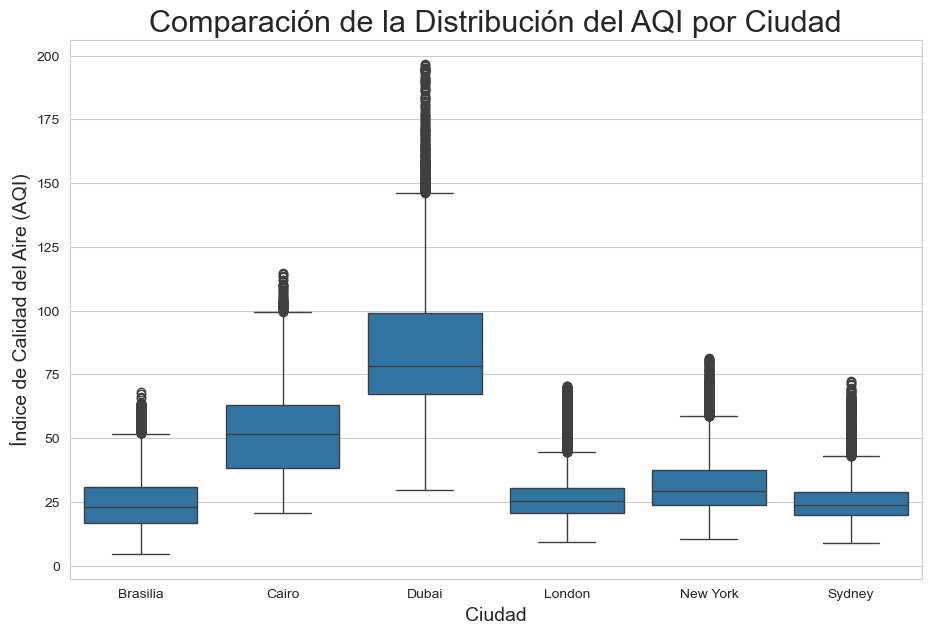

In [22]:
plt.figure(figsize=(11, 7))
# En el eje X ponemos las ciudades y en el eje Y el valor del AQI
sns.boxplot(x='City', y='AQI', data=dataFrame)

plt.title('Comparación de la Distribución del AQI por Ciudad', fontsize=22)
plt.xlabel('Ciudad', fontsize=14)
plt.ylabel('Índice de Calidad del Aire (AQI)', fontsize=14)

plt.savefig('../Images/boxplotCiudades.png', dpi=300, bbox_inches='tight')
# Mostramos el gráfico
plt.show()

### <a id="2-3"></a>2.3 Correlación de Contaminantes

Finalmente, en esta fase de exploración, queremos entender la relación numérica entre nuestras variables. Para ello, crearemos una **matriz de correlación**, que mide cómo una variable se mueve en relación con otra.

Visualizaremos esta matriz como un **mapa de calor (heatmap)**. Los valores cercanos a 1.0 (colores cálidos) indican una fuerte correlación positiva (si uno sube, el otro también), mientras que los valores cercanos a -1.0 (colores fríos) indican una fuerte correlación negativa.

Nos enfocaremos especialmente en la fila del **AQI** para ver qué contaminante tiene el mayor impacto sobre él.

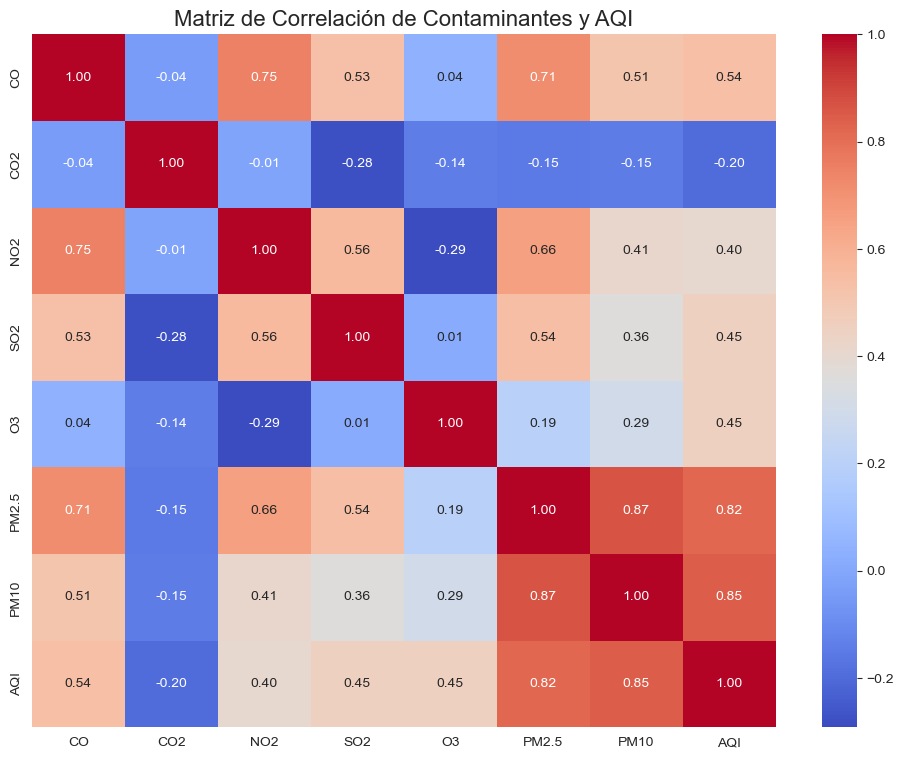

In [23]:

columnasMatriz = ['CO', 'CO2', 'NO2', 'SO2', 'O3', 'PM2.5', 'PM10', 'AQI']
dfNumerico = dataFrame[columnasMatriz]

# Matriz de correlación
matrizCorrelacion = dfNumerico.corr()

# Mapa de calor para visualizar la matriz
plt.figure(figsize=(12, 9))
sns.heatmap(matrizCorrelacion, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Matriz de Correlación de Contaminantes y AQI', fontsize=16)
plt.savefig('../Images/matrizCorrelacion.png', dpi=300, bbox_inches='tight')
plt.show()

## <a id="fase-3"></a>3. Fase 3: Modelado de Clasificación

Con los datos ya explorados, procederemos a construir y entrenar un modelo de Machine Learning. El objetivo es que el modelo aprenda a clasificar la calidad del aire como "Buena" o "Mala" a partir de las mediciones de los contaminantes. `sklearn` y `numpy`

### <a id="3-1"></a>3.1. Preparación de Datos para el Modelo
Antes de entrenar, debemos realizar un último paso de preparación fundamental:

1. **Binarizar la Variable Objetivo:** El Perceptrón es un clasificador binario. Convertiremos la columna `AQI` (que es numérica) en dos categorías: **0 (Buena)** y **1 (Mala)**, usando un umbral de 50.
2.  **Seleccionar Características y Objetivo:** Definiremos qué columnas serán nuestras variables de entrada (`x`) y cuál será nuestra variable de salida (`y`).
3.  **Dividir los Datos:** Separaremos nuestro dataset en un conjunto de entrenamiento (para enseñar al modelo) y uno de prueba (para evaluarlo).
4.  **Escalar Características:** Ajustaremos la escala de nuestros datos, un paso crucial para que algoritmos como el Perceptrón funcionen de manera óptima.

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# 1. Binarizar
# Creamos una nueva columna. Será 1 (Mala) si AQI > 50, y 0 (Buena) si AQI <= 50.
umbralAQI = 50
dataFrame['calidadBinaria'] = np.where(dataFrame['AQI'] > umbralAQI, 1, 0)

print("Distribución de las clases 'Buena' (0) y 'Mala' (1)")
print(dataFrame['calidadBinaria'].value_counts())
print("-" * 50)


# 2. Selección de Características (x) y Objetivo (y) 
# Usaremos los dos contaminantes que probablemente mostraron mayor correlación con el AQI.
features = ['PM2.5', 'PM10']
target = 'calidadBinaria'

X = dataFrame[features].values
y = dataFrame[target].values

# 3. División de Datos en Entrenamiento y Prueba (80% / 20%)
XTrain, XTest, yTrain, yTest = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y)
# 'stratify=y' asegura que la proporción de clases 0 y 1 sea la misma en ambos conjuntos.

print(f"Conjunto de entrenamiento: {XTrain.shape[0]} muestras")
print(f"Conjunto de prueba: {XTest.shape[0]} muestras")
print("-" * 50)


# 4. Escalado de Características
# Escalador SÓLO con los datos de entrenamiento para evitar fuga de información.
sc = StandardScaler()
sc.fit(XTrain)

# Transformación a ambos conjuntos.
XTrainStd = sc.transform(XTrain)
XTestStd = sc.transform(XTest)

Distribución de las clases 'Buena' (0) y 'Mala' (1)
calidadBinaria
0    37547
1    15157
Name: count, dtype: int64
--------------------------------------------------
Conjunto de entrenamiento: 42163 muestras
Conjunto de prueba: 10541 muestras
--------------------------------------------------


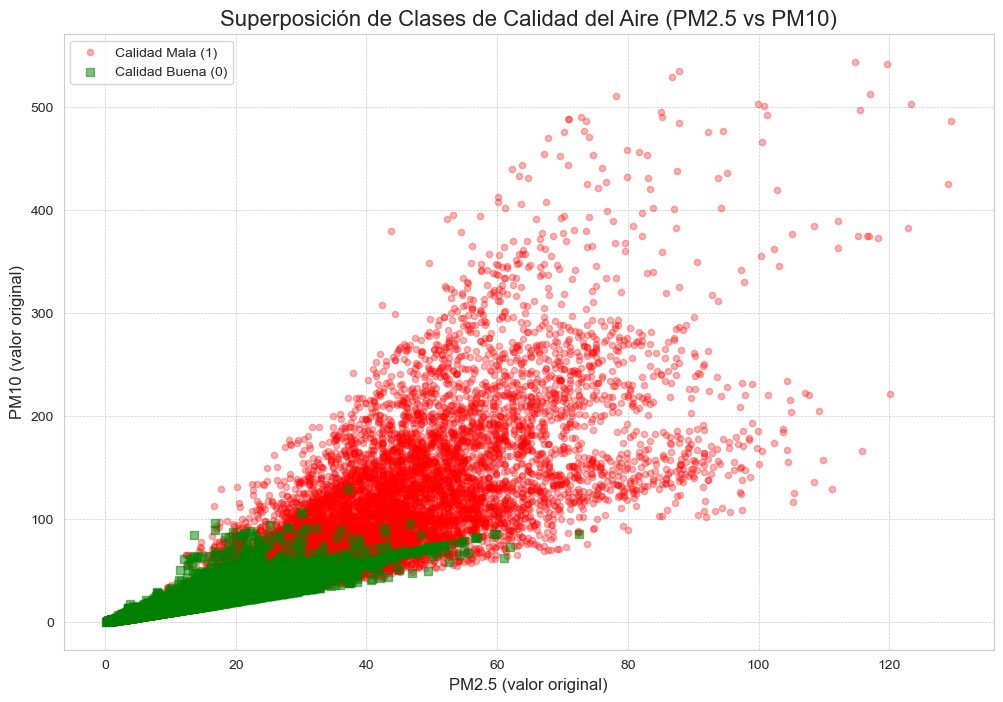

In [25]:
XBuena = X[y == 0]
XMala = X[y == 1]

# Creamos la figura
plt.figure(figsize=(12, 8)) 

plt.scatter(XMala[:, 0], XMala[:, 1],
            color='red', 
            marker='o', 
            label='Calidad Mala (1)', 
            alpha=0.3,  
            s=20)       

plt.scatter(XBuena[:, 0], XBuena[:, 1],
            color='green', 
            marker='s', 
            label='Calidad Buena (0)', 
            alpha=0.5, 
            s=30)       

# Etiquetas
plt.xlabel('PM2.5 (valor original)', fontsize=12)
plt.ylabel('PM10 (valor original)', fontsize=12)
plt.title('Superposición de Clases de Calidad del Aire (PM2.5 vs PM10)', fontsize=16)
plt.legend(loc='upper left')


plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.savefig('../Images/clasesCalidad.png', dpi=300, bbox_inches='tight')
plt.show()

### <a id="3-2"></a>3.2. Entrenamiento del Modelo (Perceptrón)

Con los datos ya preparados, divididos y escalados, crearemos una instancia del modelo Perceptrón de `scikit-learn`. Posteriormente, lo entrenaremos usando nuestro conjunto de entrenamiento (`XTrainStd` y `yTrain`).

El método `.fit()` es el corazón del aprendizaje: aquí es donde el algoritmo iterará sobre los datos para encontrar los pesos óptimos que le permitan separar las dos clases de calidad del aire.

In [26]:
# Importar el clasificador Perceptrón y la métrica de exactitud
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# 1. Instancia del modelo Perceptrón
ppn = Perceptron(eta0=0.1, random_state=42)

# 2. Entrenar el modelo con datoa escalados
ppn.fit(XTrainStd, yTrain)

# 3. Realizar predicciones con el conjunto de prueba
yPred = ppn.predict(XTestStd)

# 4. Calcular la exactitud del modelo en los datos de prueba
accuracy = accuracy_score(yTest, yPred)

print(f" Exactitud (Accuracy) en el conjunto de prueba: {accuracy * 100:.2f}%")

 Exactitud (Accuracy) en el conjunto de prueba: 88.47%


### <a id="3-3"></a>3.3. Visualización y Evaluación de Resultados

Una simple métrica de exactitud no cuenta toda la historia. En esta sección, profundizaremos en la evaluación del modelo a través de dos herramientas clave:

1.  **Matriz de Confusión:** Nos mostrará en detalle cuántas predicciones fueron correctas y cuántas incorrectas, y de qué tipo fueron los errores (ej. clasificar "Mala" calidad como "Buena").
2.  **Gráfico de Regiones de Decisión:** Al haber usado solo dos características `PM2.5` y `PM10`, podemos crear un gráfico en 2D que nos muestre la "frontera" que el Perceptrón ha aprendido para separar las dos clases. Veremos visualmente cómo el modelo divide el espacio.

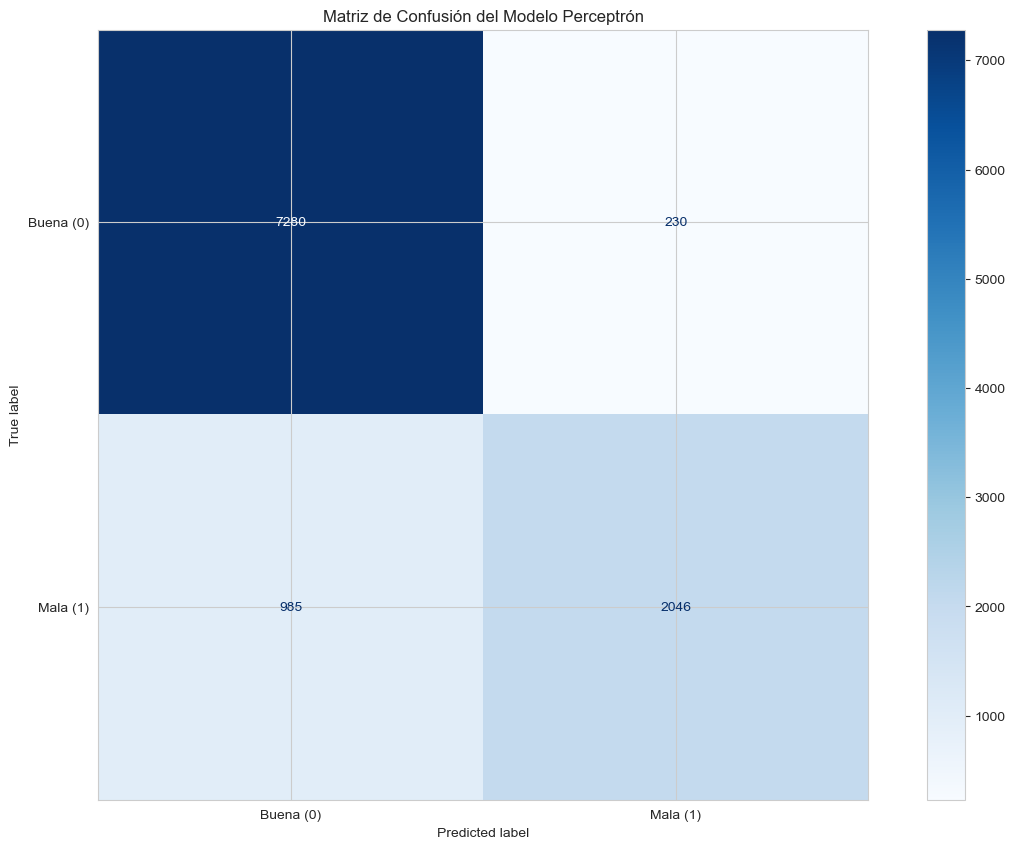

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compara las etiquetas reales yTest con las predicciones del modelo yPred
cm = confusion_matrix(yTest, yPred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Buena (0)', 'Mala (1)'])
disp.plot(cmap=plt.cm.Blues) 

plt.title('Matriz de Confusión del Modelo Perceptrón')
plt.savefig('../Images/matrizConfusion.png', dpi=300, bbox_inches='tight')
plt.show()

## <a id="fase-4"></a>4. Fase 4: Discusión y Conclusiones

Interpretación de los resultados.

### <a id="4-1"></a>4.1. Análisis del Modelo y Propuestas de Mejora

#### Rendimiento General del Modelo

* **Exactitud (Accuracy):** El modelo Perceptrón alcanzó una exactitud del **88.47%** en el conjunto de datos de prueba.
* **Interpretación:** A primera vista, una exactitud del 88.47% parece bastante buena. Sin embargo, el análisis de la matriz de confusión revela que esta métrica por sí sola no cuenta toda la historia, especialmente debido al desbalance de clases presente en los datos (37,547 muestras de clase "Buena" vs. 15,157 de clase "Mala").

![DistribucionClases](../Images/distribucionClases.png)

#### Análisis de Errores (Basado en la Matriz de Confusión)

* **Verdaderos Negativos (TN - Aciertos "Buena"):** El modelo identificó correctamente **7,280** días de buena calidad del aire.
* **Verdaderos Positivos (TP - Aciertos "Mala"):** El modelo identificó correctamente **2,046** días de mala calidad del aire.
* **Falsos Positivos (FP - Error Tipo I):** El modelo se equivocó **230** veces, prediciendo "Mala" calidad cuando era "Buena".
* **Falsos Negativos (FN - Error Tipo II):** El modelo se equivocó **985** veces, prediciendo "Buena" calidad cuando en realidad era "Mala".

La observación más crítica aquí es el alto número de **Falsos Negativos (985)**. En un contexto de salud pública, este es el error más peligroso, ya que el modelo falla en alertar sobre días potencialmente dañinos para la salud. Esto indica que el modelo está sesgado a predecir la clase mayoritaria "Buena".

#### Limitaciones del Modelo Actual

1.  **Linealidad del Perceptrón:** El Perceptrón solo puede trazar una frontera de decisión lineal. Los datos de contaminación raramente son separables por una simple línea, lo que limita intrínsecamente la capacidad del modelo para capturar la complejidad del problema.
2.  **Características Limitadas:** Para la visualización, usamos solo dos características (`PM2.5` y `PM10`). El mapa de calor de correlación mostró que, si bien estas son las más fuertes (0.82 y 0.85 respectivamente), otras variables como `CO` (0.71) y `NO2` (0.66) también tienen una correlación significativa y podrían aportar información valiosa.
3.  **Desbalance de Clases:** Como se vio, hay más del doble de muestras de la clase "Buena" que de la "Mala". Sin una estrategia para manejar esto, el modelo aprende a favorecer a la clase mayoritaria para minimizar su error global, a costa de fallar en la clase minoritaria pero más crítica.

#### Propuestas de Mejora

1.  **Manejar el Desbalance de Clases:** Implementar técnicas de remuestreo como **SMOTE** (Synthetic Minority Over-sampling Technique) para generar más ejemplos de la clase "Mala" en el conjunto de entrenamiento, o usar el parámetro `class_weight='balanced'` en modelos que lo soporten.
2.  **Utilizar Modelos No Lineales:** Probar con clasificadores más avanzados que puedan aprender fronteras complejas, como **Máquinas de Vectores de Soporte (SVM) con kernel RBF**, **Árboles de Decisión**, o un **Random Forest**.


### <a id="4-2"></a>4.2. Comparación con la Literatura y propuesta

La exactitud del 88.47% obtenida con un modelo lineal simple como el Perceptrón sirve como un buen punto de partida (baseline). Al revisar la literatura, sería importante buscar proyectos que hayan enfrentado problemas similares de clasificación de AQI. Los puntos clave a comparar serían:
* **Modelos Utilizados:** En otros proyectos similares se usa Random Forest, Gradient Boosting y redes neuronales (LSTM) para este tipo de problema, los cuales suelen reportar exactitudes superiores al 90-95%.
* **Manejo del Desbalance:** Investigar qué estrategias de remuestreo o de ajuste de costos han sido más efectivas en otros estudios.
* **Importancia de las Características:** Comparar si `PM2.5` y `PM10` son consistentemente los predictores más importantes en otros análisis urbanos.

### Tabla Comparativa de los Proyectos (Iris dataset,  Literatura dada por el profesor)

![DistribucionClases](../Images/irisDataSet.png)

| Característica Clave | Proyecto Iris (Gráfico de Ejemplo) | Air Quality |
| :--- | :--- | :--- |
| **Separabilidad de Clases** | **Linealmente Separable.** Existe un espacio vacío y claro entre los puntos rojos y los azules. Es muy fácil trazar una línea recta que los separe perfectamente. | **No Linealmente Separable.** Los puntos verdes están "dentro" de la nube de puntos rojos. No hay ninguna línea recta que pueda separar las dos clases sin cometer muchos errores. |
| **Rendimiento Esperado del Perceptrón** | **Muy alto (cercano al 100%).** Un modelo lineal como el Perceptrón es perfecto para este tipo de datos y debería lograr una exactitud casi perfecta. | **Moderado.** Un modelo lineal tendrá dificultades. La exactitud que se obtuvo (~88%) es un resultado lógico y esperado, ya que el modelo hace lo que puede con una frontera lineal. |
| **Naturaleza de los Datos** | **Clústeres bien definidos.** Cada clase forma un grupo compacto y distintivo. | **Nube de datos superpuesta.** La clase "Buena" es un subconjunto de la nube general de datos, concentrada en la zona de valores bajos. |

### <a id="4-3"></a>4.3. Trabajo Futuro

Basado en el análisis anterior, el trabajo futuro de este proyecto se centrará en tres áreas principales:

1.  **Mejora del Modelo de Clasificación:** La prioridad es implementar un clasificador **Random Forest** incluyendo todas las características de contaminantes y aplicando la técnica **SMOTE** al conjunto de entrenamiento para corregir el desbalance de clases. El objetivo es reducir drásticamente el número de Falsos Negativos.
2.  **Transición a un Modelo de Regresión:** En lugar de clasificar, se podría entrenar un modelo de regresión (como Gradient Boosting Regressor o una red neuronal) para predecir el **valor numérico exacto del AQI**, lo cual ofrecería una predicción más granular y útil.
3.  **Análisis de Series Temporales:** Aprovechar la naturaleza temporal de los datos para construir un modelo de pronóstico (como **LSTM**) que pueda predecir los niveles de AQI para las próximas 24 o 48 horas.

---

Emiliano Rodriguez Villegas

Por ultimo convertimos el notebook a un script .py con la finalidad de portabilidad y facilidad para compartir, mayor limpieza en el codigo y el versionamiento de el.

In [28]:
! python ../convertidor.py --input ../Notebooks/AirQuality.ipynb --output AirQuality.py

[NbConvertApp] Converting notebook ../Notebooks/AirQuality.ipynb to script
[NbConvertApp] Writing 21532 bytes to ..\Notebooks\AirQuality.py
